<a href="https://colab.research.google.com/github/Seowoo-Jung/ESAA/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Easy way House Price: Pycaret

## Library and Data import

In [70]:
pip install pycaret[full]

     |████████████████████████████████| 308 kB 8.4 MB/s 
     |████████████████████████████████| 57.6 MB 54.6 MB/s 
     |████████████████████████████████| 371 kB 45.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 131 kB 45.5 MB/s 
     |████████████████████████████████| 173.5 MB 9.7 kB/s 
     |████████████████████████████████| 356 kB 40.6 MB/s 
     |████████████████████████████████| 76.3 MB 1.3 MB/s 
     |████████████████████████████████| 40 kB 4.6 MB/s 
     |████████████████████████████████| 100 kB 8.9 MB/s 
     |████████████████████████████████| 6.6 MB 27.2 MB/s 
     |████████████████████████████████| 5.8 MB 18.9 MB/s 
     |████████████████████████████████| 3.6 MB 8.3 MB/s 
     |████████████████████████████████| 7.3 MB 19.1 MB/s 
     |████████████████████████████████| 275 kB 50.4 MB/s 
     |████████████████████████████████| 126 kB 39.3 MB/s 
     |█

In [23]:
#!pip install pycaret

from pycaret.regression import *
import numpy as np 
import pandas as pd 
from pandas_profiling import ProfileReport 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
        
df_train = pd.read_csv('/content/drive/MyDrive/캐글 필사/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/캐글 필사/data/test.csv')
df_train['SalePrice'] = df_train['SalePrice'].astype(int)

pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

In [24]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

## Data 일부 확인

In [2]:
print('\n \n First 5 row of Train Data : ')
display(df_train.head())

print('First 5 row of Test Data : ')
display(df_test.head())


 
 First 5 row of Train Data : 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


First 5 row of Test Data : 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Train data

In [3]:
report_train = ProfileReport(df_train)
report_train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
report_train.to_notebook_iframe()

## Test data

In [4]:
report_test = ProfileReport(df_test)
report_test

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Numeric Features 설명

- violinplot을 이용하여 연속형 변수의 분포 확인

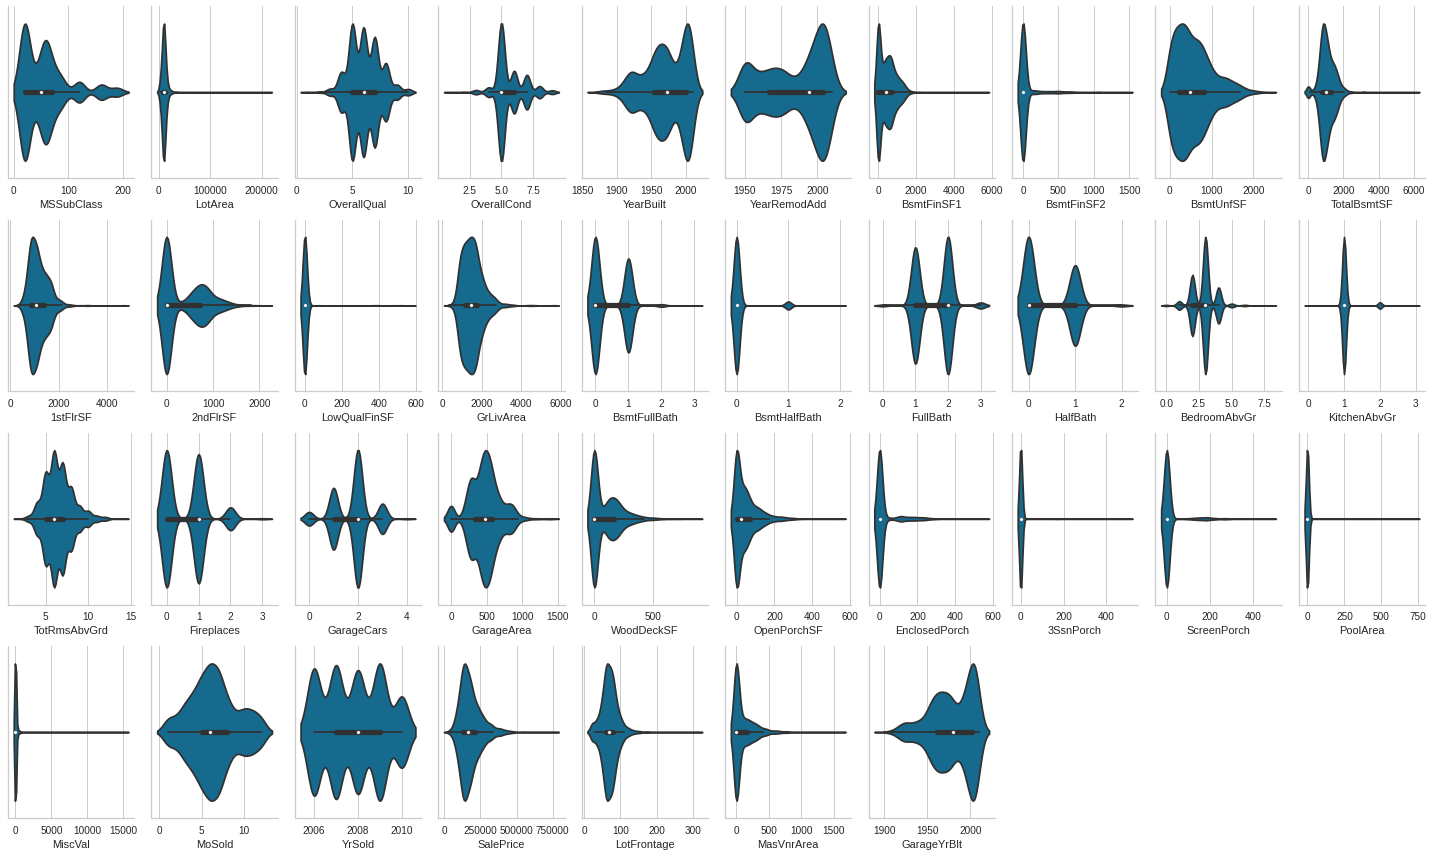

In [5]:
index_int_float = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
        'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

plt.figure(figsize=[20,12])
i = 1
for col in index_int_float :
    plt.subplot(4,10,i)
    sns.violinplot(x=col, data= df_train, orient='v')
    sns.despine() # 그래프의 테두리를 제거
    i = i+1
plt.tight_layout() # 서브 플롯 간 간격 조절
plt.show()
    

## Categorical Features 설명

- scatter plot을 이용하여 분포를 확인

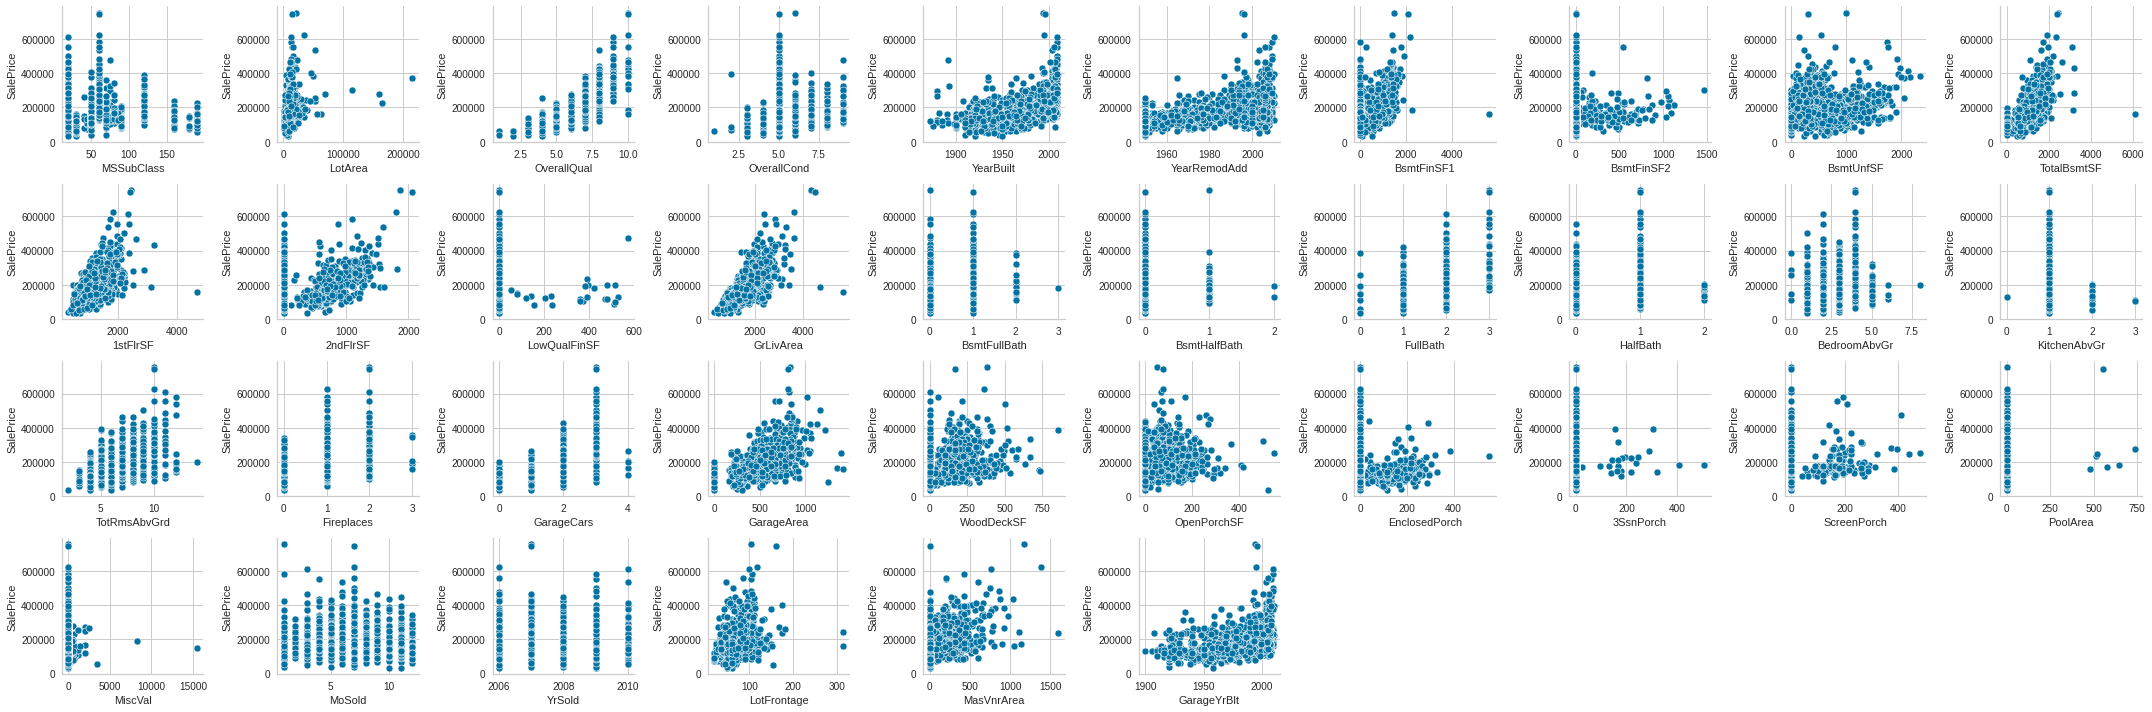

In [6]:
index_str = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

plt.figure(figsize=[30,10])
i = 1
for col in index_str :
    plt.subplot(4,10,i)
    sns.scatterplot(x=col, y = 'SalePrice' ,data= df_train)
    sns.despine()
    i = i+1
plt.tight_layout()
plt.show()

## Data Engineering

- train과 test 데이터를 합쳐서 train과 test에 공통적으로 전처리한다.




In [25]:
df_test['SalePrice'] = 'test' # test data에 SalePrice를 만들어주고 'test'로 채워넣는다.
df = pd.concat([df_train, df_test]) # df하는 변수로 합침
df.drop(['Id'], axis=1, inplace = True) # Id는 분석에 사용하지 않을 것이므로 없애준다.

In [26]:
print('df:', df.shape)
print('test data:',df_test.shape)
print('train data:',df_train.shape)

df: (2919, 80)
test data: (1459, 81)
train data: (1460, 81)


- 결측치 제거

--> data description 참조

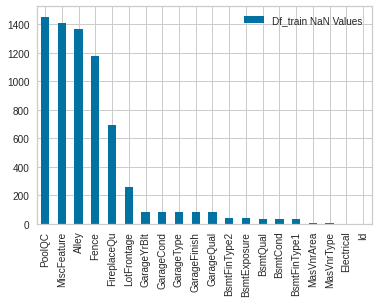

In [28]:
# train data에서의 결측치
pd.DataFrame(df_train.isna().sum(), columns = ['Df_train NaN Values']).sort_values(by='Df_train NaN Values', ascending = False).head(20).plot(kind = 'bar')

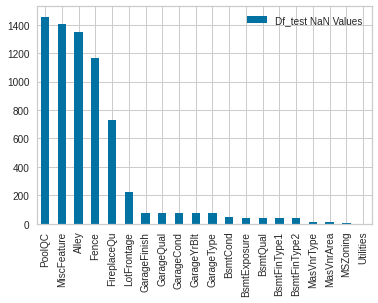

In [29]:
# test data에서의 결측치
pd.DataFrame(df_test.isna().sum(), columns = ['Df_test NaN Values']).sort_values(by='Df_test NaN Values', ascending = False).head(20).plot(kind = 'bar')

In [44]:
# 범주형: data 설명 대로 혹은 가장 기본 옵션으로 채운다.
# 수치형: 대체로 최솟값으로 결측값 채움
df['PoolQC'].fillna('No Pool', inplace = True)
df['MiscFeature'].fillna('None', inplace = True)
df['Alley'].fillna('No alley access', inplace = True)
df['Fence'].fillna('No Fence', inplace = True)
df['FireplaceQu'].fillna('No Fireplace', inplace = True)
df['LotFrontage'].fillna(60.0, inplace = True) # Q1
df['GarageCond'].fillna('No Garage', inplace = True)
df['GarageType'].fillna('No Garage', inplace = True)
df['GarageYrBlt'].fillna(1890, inplace = True) # min: 1895
df['GarageFinish'].fillna('No Garage', inplace = True)
df['GarageQual'].fillna('No Garage', inplace = True)
df['BsmtExposure'].fillna('No Basement', inplace = True)
df['BsmtFinType2'].fillna('No Basement', inplace = True)
df['BsmtFinType1'].fillna('No Basement', inplace = True)
df['BsmtCond'].fillna('No Basement', inplace = True)
df['BsmtQual'].fillna('No Basement', inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)
df['MasVnrType'].fillna('None', inplace = True)
df['BsmtFullBath'].fillna(0, inplace = True) 
df['BsmtHalfBath'].fillna(0, inplace = True) 
# 물리적 환경에 따른 sale type을 지정
df.loc[(df['MSZoning'].isna()) & (df['Neighborhood'] == 'IDOTRR'), 'MSZoning'] = 'RM'
df.loc[(df['MSZoning'].isna()) & (df['Neighborhood'] == 'Mitchel'), 'MSZoning'] = 'RL'
df['Utilities'].fillna('AllPub', inplace = True) 
df['Functional'].fillna('Typ', inplace = True)
df['Exterior1st'].fillna('VinylSd', inplace = True)
df['Exterior2nd'].fillna('VinylSd', inplace = True)
df['TotalBsmtSF'].fillna(0, inplace = True)
df['BsmtUnfSF'].fillna(0, inplace = True)
df['BsmtFinSF2'].fillna(0, inplace = True)
df['GarageArea'].fillna(0, inplace = True)
df['GarageCars'].fillna(0, inplace = True)
df['KitchenQual'].fillna('TA', inplace = True)
df['BsmtFinSF1'].fillna(0, inplace = True)
df['SaleType'].fillna('WD', inplace = True)
df['Electrical'].fillna('SBrkr', inplace = True)
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)

print('Filling of Missing Data, Done.')

Filling of Missing Data, Done.


ex) BsmtFullBath:  # of Basement full bathrooms. 

ex) SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other



In [47]:
df['YrSold'].describe()

count    2919.000000
mean     2007.792737
std         1.314964
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

- 새로운 변수 만들기

In [49]:
# 범주형 변수(ordinal) 숫자로 mapping
df['BsmtExposure'] = df['BsmtExposure'].map({'No Basement' : 0 ,'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4})
df['KitchenQual'] = df['KitchenQual'].map({'Po' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

# 범주형 변수 숫자로 mapping
df['Street'] = df['Street'].map({'Grvl': 0, 'Pave' : 1})
df['Alley'] = df['Alley'].map({'Grvl': 1, 'Pave' : 2 , 'No alley access' : 0 })
df['LotShape'] = df['LotShape'].map({'IR3': 0, 'IR2' : 1 , 'IR1' : 2 , 'Reg' : 3})
df['LandContour'] = df['LandContour'].map({'Low': 0, 'HLS' : 1 , 'Bnk' : 2 , 'Lvl' : 3})
df['Utilities'] = df['Utilities'].map({'ELO': 0, 'NoSeWa' : 1 , 'NoSewr' : 2 , 'AllPub' : 3})
df['LandSlope'] = df['LandSlope'].map({'Gtl': 2, 'Mod' : 1 , 'Sev' : 0})


# garage나 집이 가장 오래된 집/garage가 지어진 시점으로 부터 얼마나 되었는지?
df['GarageYrBlt_Years'] =  abs(1890.0 - df['GarageYrBlt'])
df['YearBuilt_Years'] = abs(1872.0 - df['YearBuilt'])
df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)
df['YearBuilt'] = df['YearBuilt'].astype(str)


# 집이 팔린지 얼마나 되었는지?
tmp = df['MoSold'].map({ 1: 0.0833, 2: 0.1666, 3: 0.25, 4: 0.3333, 5: 0.4166, 6: 0.50, 7: 0.5833, 8: 0.6666, 9: 0.75, 10: 0.8333
      , 11: 0.9166
      , 12: 0.9999}) # 0과 1사이의 숫자로 mapping (1년하고도 얼마나 시간이 흘렀는지?)
df['YearSold'] = abs(2006.0 - (df['YrSold'] + tmp)).astype(float)
df['MoSold'] = df['MoSold'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)


# 집이 지어진 시점과 보수공사를 한 시점이 일치하는지?> 그 차이를 본다. (즉, 집이 지어지고 보수공사를 했는지 안했는지?)
criteria = [df['YearRemodAdd'] == df['YearBuilt'], df['YearRemodAdd'] != df['YearBuilt']]
values = [0, 1]

df['Remod'] = np.select(criteria, values, 0) # remodeling을 했는지에 대한 여부
df['YearRemod'] = (df['YearRemodAdd'].astype(int) - df['YearBuilt'].astype(int)).astype(int)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)
df['YearBuilt'] = df['YearBuilt'].astype(str)


# 집의 위치가 갖는 특성을 하나의 변수로 정리 (condition이 비슷한 애들끼리 묶어서 범주를 단순화시킴)

criteria = [
#AA
((df['Condition1'] == 'Artery') | (df['Condition1'] == 'RRAn') | (df['Condition1'] == 'PosA') | (df['Condition1'] == 'RRAe'))
&
((df['Condition2'] == 'Artery') | (df['Condition2'] == 'RRAn') | (df['Condition2'] == 'PosA') | (df['Condition2'] == 'RRAe'))
,
#AB
((df['Condition1'] == 'Artery') | (df['Condition1'] == 'RRAn') | (df['Condition1'] == 'PosA') | (df['Condition1'] == 'RRAe'))
&
((df['Condition2'] == 'Feedr') | (df['Condition2'] == 'RRNn') | (df['Condition2'] == 'PosN') | (df['Condition2'] == 'RRNe'))
,
#BA
((df['Condition2'] == 'Artery') | (df['Condition2'] == 'RRAn') | (df['Condition2'] == 'PosA') | (df['Condition2'] == 'RRAe'))
&
((df['Condition1'] == 'Feedr') | (df['Condition1'] == 'RRNn') | (df['Condition1'] == 'PosN') | (df['Condition1'] == 'RRNe'))
,
#BB
((df['Condition1'] == 'Feedr') | (df['Condition1'] == 'RRNn') | (df['Condition1'] == 'PosN') | (df['Condition1'] == 'RRNe'))
&
((df['Condition2'] == 'Feedr') | (df['Condition2'] == 'RRNn') | (df['Condition2'] == 'PosN') | (df['Condition2'] == 'RRNe'))
,
#A0
((df['Condition1'] == 'Artery') | (df['Condition1'] == 'RRAn') | (df['Condition1'] == 'PosA') | (df['Condition1'] == 'RRAe'))
&
(df['Condition2'] == 'Norm')
,
#0A
((df['Condition2'] == 'Artery') | (df['Condition2'] == 'RRAn') | (df['Condition2'] == 'PosA') | (df['Condition2'] == 'RRAe'))
&
(df['Condition1'] == 'Norm' )
,
#B0
((df['Condition1'] == 'Feedr') | (df['Condition1'] == 'RRNn') | (df['Condition1'] == 'PosN') | (df['Condition1'] == 'RRNe'))
&
(df['Condition2'] == 'Norm' )
,
#0B
((df['Condition2'] == 'Feedr') | (df['Condition2'] == 'RRNn') | (df['Condition2'] == 'PosN') | (df['Condition2'] == 'RRNe'))
&
(df['Condition1'] == 'Norm')
,
#00
(df['Condition1'] == 'Norm' )
&
(df['Condition2'] == 'Norm' )
]

values = [4,3,3,2,2,2,1,1,0]
df['conditions'] = np.select(criteria, values, 10)

# 집 바깥이 어떤 것으로 채워져 있는지에 대해 범주 단순화

df['Exterior2nd'] = df['Exterior2nd'].map({ 'AsbShng': 'AsbShng', 'AsphShn': 'AsphShn', 'Brk Cmn': 'BrkComm', 'BrkFace': 'BrkFace', 'CBlock': 'CBlock', 'CmentBd': 'CemntBd',
                       'HdBoard': 'HdBoard', 'ImStucc': 'ImStucc', 'MetalSd': 'MetalSd', 'Plywood': 'Plywood'
                      , 'Stone': 'Stone'
                      , 'Stucco': 'Stucco'
                      ,'VinylSd': 'VinylSd'
                      ,'Wd Sdng': 'Wd Sdng'
                      ,'Wd Shng': 'WdShing'
                      , 'None'  : 'None'
                      , 'Other' :  'Other'})

criteria = [
# Only 1
((df['Exterior1st'] == df['Exterior2nd']) | (df['Exterior2nd'] !=  'Other'))
,
# No One
(df['Exterior1st'] == 'None') &  (df['Exterior2nd'] == 'None')
,
# 2
(df['Exterior1st'] !=  df['Exterior2nd']) 
]

values = [1,0,2]
df['Exterior'] = np.select(criteria, values, 10)


# 석조의 세분화된 유형을 binary하게 나눈다.(석조 존재함, 존재하지 않음.)

criteria = [
# Have veneer 
(df['MasVnrType'] != 'None')
,
# Havnt veneer    
(df['MasVnrType'] == 'None')
]

values = [1,0]
df['veneer'] = np.select(criteria, values, 10)


## 범주형 변수 mapping
df['ExterQual'] = df['ExterQual'].map({'Po' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['ExterCond'] = df['ExterCond'].map({'Po' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['BsmtQual'] = df['BsmtQual'].map({'No Basement' : 0 ,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5})

df['BsmtFinType1'] = df['BsmtFinType1'].map({'No Basement' : 0 ,'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ': 6})

df['BsmtFinType2'] = df['BsmtFinType2'].map({'No Basement' : 0 ,'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ': 6})


# basement의 quality에 대한 척도를 단순화시킨다.

criteria = [
# No Bsmt
(df['BsmtFinType1'] == 0) & (df['BsmtFinType2'] == 0)
,
# 1 Bsmt   
((df['BsmtFinType1'] != 0) & (df['BsmtFinType2'] != 0) & (df['BsmtFinType1'] == df['BsmtFinType2']))
|
((df['BsmtFinType1'] != 0) & (df['BsmtFinType2'] == 0))
|
((df['BsmtFinType1'] == 0) & (df['BsmtFinType2'] != 0)) 
,
# 2 bsmnt
(df['BsmtFinType1'] != 0) & (df['BsmtFinType2'] != 0) & (df['BsmtFinType1'] != df['BsmtFinType2'])
]

values = [0,1,2]
df['Bsmt'] = np.select(criteria, values, 10)



# 범주형 변수 숫자에 mapping
df['HeatingQC'] = df['HeatingQC'].map({'Po' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['CentralAir'] = df['CentralAir'].map({'N' : 0 ,'Y' : 1})

df['FireplaceQu'] = df['FireplaceQu'].map({'No Fireplace' : 0 ,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4 , 'Ex' : 5})

df['Functional'] = df['Functional'].map({'Sal' : 0 ,'Sev' : 1, 'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4 , 'Min2' : 5, 'Min1' : 6, 'Typ' : 7})


# Garage type에 따라 숫자로 mapping
criteria = [
# No garage
df['GarageType'] == 'No Garage'
,
#2 garages
df['GarageType'] == '2Types'
,
# only one garage
(df['GarageType'] != '2Types') & (df['GarageType'] != 'No Garage')
]

values = [0,2,1]
df['Garage'] = np.select(criteria, values, 10)


# 범주형 변수 숫자에 mapping
df['GarageFinish'] = df['GarageFinish'].map({'No Garage' : 0 ,'Unf' : 1, 'RFn' : 2, 'Fin' : 3})

df['GarageQual'] = df['GarageQual'].map({'No Garage' : 0 ,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4 , 'Ex' :5})

df['GarageCond'] = df['GarageCond'].map({'No Garage' : 0 ,'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4 , 'Ex' :5})

df['PavedDrive'] = df['PavedDrive'].map({'N' : 0 ,'P' : 1, 'Y' : 2})

df['PoolQC'] = df['PoolQC'].map({'No Pool' : 0 ,'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

df['Fence'] = df['Fence'].map({'No Fence' : 0 ,'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4})



# 다른 변수에서 다루지 않은 기타 기능이 있는지 없는지로 구분.
criteria = [
# No Feature
df['MiscFeature'] == 'None'
,
# with Feature
df['MiscFeature'] != 'None'
]
values = [0,1]
df['Feature'] = np.select(criteria, values, 10)



df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] +df['GarageArea'] # 전체 면적
df['Bathrooms'] = df['FullBath'] + df['HalfBath']*0.5  # bathroom의 총 개수
df['Year average']= (df['YearRemodAdd'].astype(int)+df['YearBuilt'].astype(int))/2 # 집이 지어진 year와 remodeling year의 평균점


# HasBsmt: basement가 있는지 없는지 여부
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df_train.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

print('Adding New Features, Done.')

Adding New Features, Done.


- skewed된 데이터의 분포 정리 --> log취해서 정규분포 형태로 만들어주기


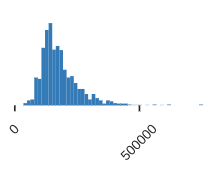

In [51]:
df_train = df[df['SalePrice'] != 'test']
df_test = df[df['SalePrice'] == 'test']
df_train['SalePrice'] = df_train['SalePrice'].astype(float)

df_train['SalePrice'] =  np.log(df_train['SalePrice'])
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

print('Adjustment of Skewness, Done.')

Adjustment of Skewness, Done.


## Setup

- 모델링 하기 위한 준비

In [72]:
int_features = ['LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LandSlope', 'OverallQual', 'ExterQual', 'ExterCond', 'BsmtQual',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
        'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'PoolQC', 'Fence', 'MiscVal', 'Remod', 'YearRemod',
        'conditions', 'Exterior', 'veneer', 'Bsmt', 'Garage', 'Feature',
        'HasBsmt']

float_feartues = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'GarageCars', 'GarageArea', 'GarageYrBlt_Years', 'YearBuilt_Years',
        'YearSold', 'TotalArea', 'Bathrooms', 'Year average']

obj_features = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'Foundation', 'BsmtCond', 'Heating', 'Electrical',
        'GarageType', 'GarageYrBlt', 'MiscFeature', 'MoSold', 'YrSold',
        'SaleType', 'SaleCondition']

exp_reg = setup(df_train, #Train Data
                target = 'SalePrice',  #Target
                categorical_features = obj_features, # Categorical Features
                numeric_features = int_features + float_feartues, # Numeric Features
                normalize = True, # Normalize Dataset
                remove_outliers = True, # Remove 5% Outliers
                remove_multicollinearity = True, # Remove Multicollinearity
                silent = True # Process Automation
               )

,Description,Value
0,session_id,8792
1,Target,SalePrice
2,Original Data,"(1460, 95)"
3,Missing Values,False
4,Numeric Features,67
5,Categorical Features,27
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(970, 433)"


## Compare models

- 여러 모델 간 비교

In [73]:
compare_models(exclude = ['tr'], sort = 'RMSLE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0767,0.0135,0.1139,0.9051,0.0088,0.0064,8.228
br,Bayesian Ridge,0.0802,0.0151,0.1184,0.8906,0.0092,0.0067,0.229
gbr,Gradient Boosting Regressor,0.0820,0.0156,0.1223,0.8935,0.0095,0.0069,0.742
lightgbm,Light Gradient Boosting Machine,0.0843,0.0162,0.1255,0.8894,0.0097,0.0071,0.230
ridge,Ridge Regression,0.0892,0.0182,0.1315,0.8687,0.0102,0.0075,0.036
rf,Random Forest Regressor,0.0901,0.0180,0.1323,0.8777,0.0103,0.0075,2.291
et,Extra Trees Regressor,0.0892,0.0181,0.1326,0.8785,0.0103,0.0075,2.338
omp,Orthogonal Matching Pursuit,0.0897,0.0204,0.1388,0.8525,0.0108,0.0075,0.036
ada,AdaBoost Regressor,0.1168,0.0242,0.1547,0.8365,0.0119,0.0097,0.513
knn,K Neighbors Regressor,0.1236,0.0309,0.1740,0.7936,0.0135,0.0103,0.116


## Create and train models

- cv=10로 교차검증하여 성능을 확인할 수 있다.

- bayesian ridge 모델의 성능이 가장 좋다.

In [74]:
model_br = create_model('br') #Bayesian Ridge

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0797,0.0104,0.1019,0.9019,0.0079,0.0066
1,0.0784,0.0106,0.1027,0.9568,0.0080,0.0065
2,0.0749,0.0106,0.1028,0.9292,0.0079,0.0062
3,0.0671,0.0069,0.0833,0.9512,0.0064,0.0056
4,0.0861,0.0149,0.1220,0.9222,0.0097,0.0072
5,0.0941,0.0389,0.1974,0.6171,0.0145,0.0079
6,0.0783,0.0102,0.1012,0.9315,0.0078,0.0065
7,0.0736,0.0091,0.0954,0.9309,0.0074,0.0062
8,0.0954,0.0239,0.1545,0.8719,0.0124,0.0081
9,0.0742,0.0152,0.1233,0.8936,0.0097,0.0063


In [75]:
model_lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0690,0.0088,0.0936,0.9172,0.0072,0.0057
1,0.0886,0.0164,0.1279,0.9330,0.0098,0.0074
2,0.0807,0.0138,0.1175,0.9076,0.0091,0.0067
3,0.0717,0.0091,0.0954,0.9360,0.0072,0.0059
4,0.0922,0.0189,0.1374,0.9014,0.0110,0.0078
5,0.0939,0.0255,0.1596,0.7496,0.0121,0.0079
6,0.0893,0.0151,0.1227,0.8992,0.0096,0.0075
7,0.0808,0.0130,0.1141,0.9011,0.0088,0.0068
8,0.0911,0.0233,0.1525,0.8751,0.0121,0.0077
9,0.0853,0.0180,0.1342,0.8741,0.0105,0.0072


In [76]:
model_ridge = create_model('ridge') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0925,0.0149,0.1219,0.8595,0.0094,0.0077
1,0.0823,0.0120,0.1096,0.9508,0.0085,0.0069
2,0.0835,0.0127,0.1127,0.9149,0.0087,0.0070
3,0.0853,0.0151,0.1228,0.8940,0.0094,0.0071
4,0.0882,0.0147,0.1211,0.9234,0.0096,0.0074
5,0.1029,0.0408,0.2020,0.5989,0.0149,0.0086
6,0.0848,0.0124,0.1116,0.9167,0.0087,0.0071
7,0.0859,0.0119,0.1092,0.9094,0.0085,0.0072
8,0.1107,0.0298,0.1727,0.8399,0.0138,0.0094
9,0.0757,0.0173,0.1313,0.8794,0.0103,0.0064


## model tuning

- 무작위 숫자를 이용하여 tuning을 실행한다. default로 10번 반복

In [82]:
tuned_br = tune_model(model_br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0797,0.0104,0.1020,0.9017,0.0079,0.0066
1,0.0783,0.0105,0.1026,0.9569,0.0080,0.0065
2,0.0749,0.0106,0.1028,0.9292,0.0079,0.0062
3,0.0671,0.0069,0.0834,0.9512,0.0064,0.0056
4,0.0859,0.0149,0.1219,0.9224,0.0097,0.0072
5,0.0941,0.0390,0.1974,0.6169,0.0145,0.0079
6,0.0782,0.0102,0.1011,0.9316,0.0078,0.0065
7,0.0736,0.0091,0.0953,0.9310,0.0074,0.0062
8,0.0955,0.0239,0.1546,0.8717,0.0124,0.0081
9,0.0741,0.0152,0.1234,0.8936,0.0097,0.0063


In [83]:
tuned_lightgbm = tune_model(model_lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0771,0.0101,0.1003,0.9049,0.0078,0.0064
1,0.0952,0.0196,0.1401,0.9196,0.0106,0.0078
2,0.0823,0.0127,0.1125,0.9152,0.0087,0.0069
3,0.0841,0.0119,0.1092,0.9163,0.0084,0.0070
4,0.1067,0.0242,0.1556,0.8735,0.0124,0.0090
5,0.0983,0.0250,0.1582,0.7539,0.0120,0.0082
6,0.0930,0.0170,0.1305,0.8860,0.0101,0.0078
7,0.0844,0.0141,0.1187,0.8930,0.0092,0.0071
8,0.1050,0.0288,0.1698,0.8452,0.0134,0.0089
9,0.0945,0.0220,0.1484,0.8459,0.0115,0.0080


In [84]:
tuned_ridge = tune_model(model_ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0870,0.0125,0.1120,0.8814,0.0087,0.0073
1,0.0790,0.0108,0.1037,0.9560,0.0081,0.0066
2,0.0788,0.0115,0.1073,0.9229,0.0083,0.0066
3,0.0766,0.0103,0.1015,0.9275,0.0077,0.0063
4,0.0854,0.0140,0.1183,0.9269,0.0094,0.0072
5,0.0985,0.0400,0.2000,0.6069,0.0147,0.0082
6,0.0791,0.0108,0.1041,0.9275,0.0081,0.0066
7,0.0794,0.0102,0.1011,0.9223,0.0078,0.0067
8,0.1033,0.0270,0.1643,0.8550,0.0132,0.0088
9,0.0738,0.0162,0.1273,0.8866,0.0100,0.0063


In [ ]:
# tune hyperparameters with custom_grid
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }
tuned_dt_custom = tune_model(dt, custom_grid = params)


## Learning Curve

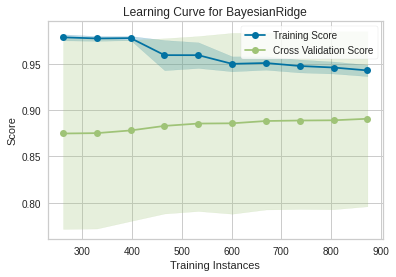

In [85]:
plot_model(tuned_br, plot = 'learning')

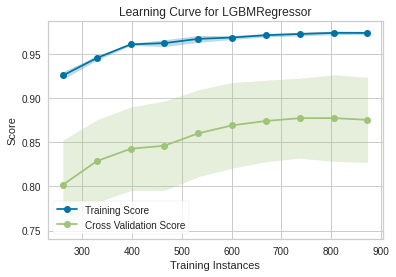

In [86]:
plot_model(tuned_lightgbm, plot = 'learning')

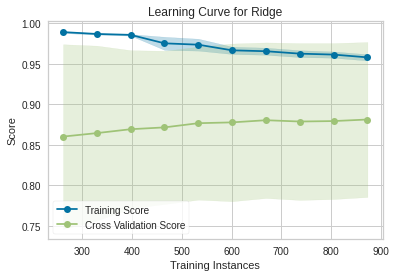

In [87]:
plot_model(tuned_ridge, plot = 'learning')

## Blending

In [89]:
blender = blend_models(estimator_list = [tuned_br, tuned_lightgbm, tuned_ridge])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0748,0.0093,0.0965,0.9120,0.0075,0.0062
1,0.0759,0.0103,0.1014,0.9579,0.0078,0.0063
2,0.0705,0.0097,0.0983,0.9353,0.0076,0.0059
3,0.0664,0.0068,0.0825,0.9522,0.0063,0.0055
4,0.0861,0.0154,0.1240,0.9197,0.0099,0.0073
5,0.0914,0.0322,0.1795,0.6833,0.0133,0.0076
6,0.0766,0.0106,0.1031,0.9289,0.0080,0.0064
7,0.0731,0.0092,0.0958,0.9302,0.0074,0.0061
8,0.0932,0.0237,0.1540,0.8727,0.0123,0.0079
9,0.0715,0.0161,0.1269,0.8874,0.0099,0.0061


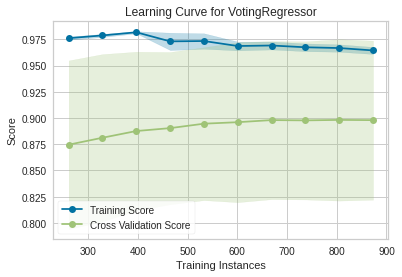

None

In [90]:
display(plot_model(blender, plot = 'learning'))

## Prediction

In [91]:
predictions = predict_model(blender, data = df_test)